In [1]:
%matplotlib inline

# Reference for the animation embedding: http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
# Code from Doing Math with Python
# NB: Matplotlib Animation doesn't need Jupyter Notebook support.

from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib import pyplot as plt
import math

from ipywidgets import interact
import ipywidgets as widgets


In [5]:
g = 9.8

def get_intervals(u, theta):
    t_flight = 2*u*math.sin(theta)/g
    intervals = []
    start = 0
    interval = 0.01
    while start < t_flight:
        intervals.append(start)
        start = start + interval
    return intervals

def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u*math.cos(theta)*t
    y = u*math.sin(theta)*t - 0.5*g*t*t
    circle.center = x, y
    return circle,

def create_animation(u, theta):
    theta = math.radians(theta)
    intervals = get_intervals(u, theta)
    xmin = 0
    xmax = u*math.cos(theta)*intervals[-1]
    ymin = 0
    t_max = u*math.sin(theta)/g
    ymax = u*math.sin(theta)*t_max - 0.5*g*t_max**2
    fig = plt.gcf()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    circle = plt.Circle((xmin, ymin), 1.0)
    ax.add_patch(circle)
    anim = animation.FuncAnimation(fig, update_position,
                        fargs=(circle, intervals, u, theta),
                        frames=len(intervals), interval=10,
                        repeat=False, blit=True)
    
    
    HTML(anim.to_html5_video())


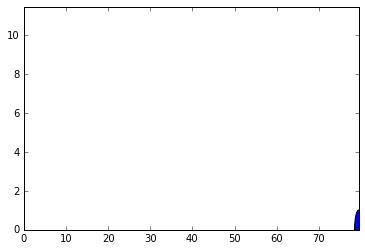

In [8]:
i = interact(create_animation, 
             u=widgets.IntSlider(min=30, max=90,step=5,value=30), 
             theta=widgets.IntSlider(min=20, max=80,step=5,value=30),
             _manual=True
             )
